In [1]:
import pandas as pd
import numpy as np

In [2]:
credit_df = pd.read_csv('German_Credit_Data.csv')
credit_df

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,1736,A61,A74,3,A92,4,31,A143,1,A172,0
996,A11,30,A32,3857,A61,A73,4,A91,4,40,A143,1,A174,0
997,A14,12,A32,804,A61,A75,4,A93,4,38,A143,1,A173,0
998,A11,45,A32,1845,A61,A73,4,A93,4,23,A143,1,A173,1


In [3]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [4]:
credit_df.shape

(1000, 14)

In [5]:
credit_df.iloc[:5,:7]

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate
0,A11,6,A34,1169,A65,A75,4
1,A12,48,A32,5951,A61,A73,2
2,A14,12,A34,2096,A61,A74,2
3,A11,42,A32,7882,A61,A74,2
4,A11,24,A33,4870,A61,A73,3


In [6]:
credit_df.iloc[:5,7:]

,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A93,4,67,A143,2,A173,0
1,A92,2,22,A143,1,A173,1
2,A93,3,49,A143,1,A172,0
3,A93,4,45,A143,1,A173,0
4,A93,4,53,A143,2,A173,1


In [7]:
credit_df['status'].value_counts()

status
0    700
1    300
Name: count, dtype: int64

In [10]:
x = credit_df.drop('status',axis=1)
y = credit_df['status']

In [11]:
encoded_credit_df = pd.get_dummies(x,drop_first=True)

In [12]:
encoded_credit_df.columns

Index(['duration', 'amount', 'inst_rate', 'residing_since', 'age',
       'num_credits', 'checkin_acc_A12', 'checkin_acc_A13', 'checkin_acc_A14',
       'credit_history_A31', 'credit_history_A32', 'credit_history_A33',
       'credit_history_A34', 'savings_acc_A62', 'savings_acc_A63',
       'savings_acc_A64', 'savings_acc_A65', 'present_emp_since_A72',
       'present_emp_since_A73', 'present_emp_since_A74',
       'present_emp_since_A75', 'personal_status_A92', 'personal_status_A93',
       'personal_status_A94', 'inst_plans_A142', 'inst_plans_A143', 'job_A172',
       'job_A173', 'job_A174'],
      dtype='object')

In [13]:
x = encoded_credit_df

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
model_dt = DecisionTreeClassifier(criterion='gini',max_depth=3)

In [18]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

### Measuring Test Accuracy

In [19]:
y_pred = model_dt.predict(x_test)

In [20]:
from sklearn import metrics

In [21]:
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))

0.7266666666666667
0.5835743204164258


### Displaying the Tree

In [22]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(0.5, 0.875, 'checkin_acc_A14 <= 0.5\ngini = 0.419\nsamples = 700\nvalue = [491.0, 209.0]'),
 Text(0.25, 0.625, 'duration <= 33.0\ngini = 0.484\nsamples = 425\nvalue = [251, 174]'),
 Text(0.125, 0.375, 'amount <= 10975.5\ngini = 0.458\nsamples = 343\nvalue = [221, 122]'),
 Text(0.0625, 0.125, 'gini = 0.451\nsamples = 337\nvalue = [221, 116]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.375, 0.375, 'savings_acc_A65 <= 0.5\ngini = 0.464\nsamples = 82\nvalue = [30, 52]'),
 Text(0.3125, 0.125, 'gini = 0.431\nsamples = 70\nvalue = [22, 48]'),
 Text(0.4375, 0.125, 'gini = 0.444\nsamples = 12\nvalue = [8, 4]'),
 Text(0.75, 0.625, 'inst_plans_A143 <= 0.5\ngini = 0.222\nsamples = 275\nvalue = [240.0, 35.0]'),
 Text(0.625, 0.375, 'residing_since <= 2.5\ngini = 0.423\nsamples = 46\nvalue = [32, 14]'),
 Text(0.5625, 0.125, 'gini = 0.491\nsamples = 23\nvalue = [13.0, 10.0]'),
 Text(0.6875, 0.125, 'gini = 0.287\nsamples = 23\nvalue = [19, 4]'),
 Text(0.875, 0.375, 

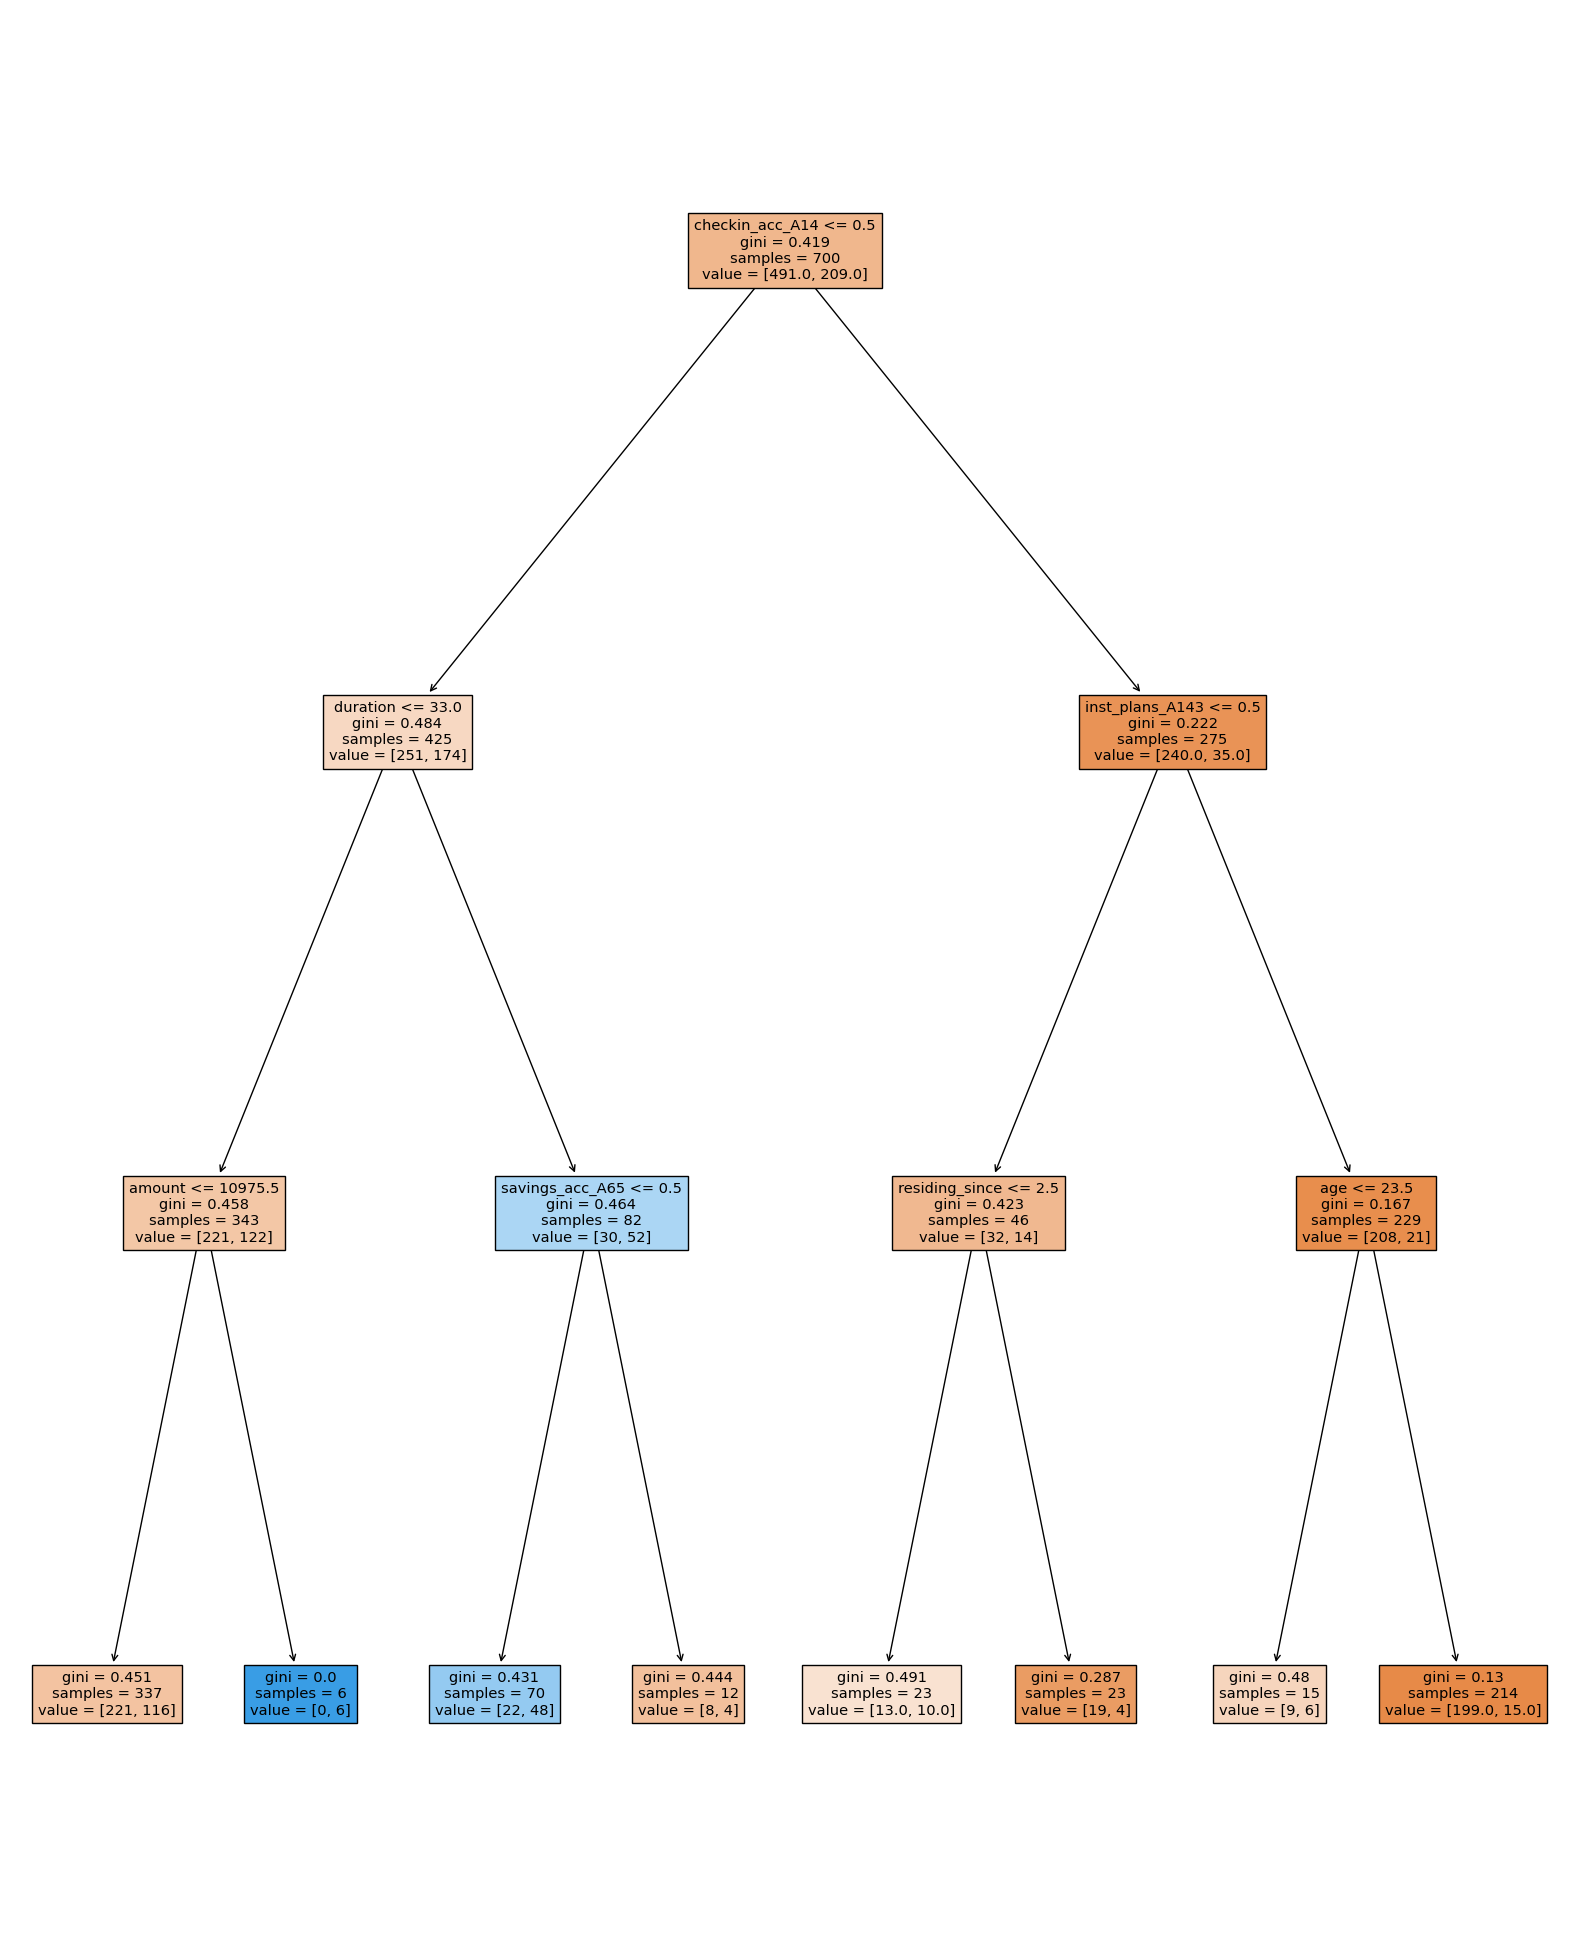

In [24]:
plt.figure(figsize = (20,25))
tree.plot_tree(model_dt,feature_names=x.columns,filled=True)

In [25]:
from sklearn.model_selection import GridSearchCV

In [28]:
param = [{'criterion': ['gini','entropy'], 'max_depth' : range(2,10)}]
model = DecisionTreeClassifier()
modelCV = GridSearchCV(model,param,cv=10,scoring='roc_auc')
modelCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [29]:
modelCV.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [30]:
modelCV.best_score_

0.6833090864917397

### Performance Measures

In [31]:
mat = metrics.confusion_matrix(y_test,y_pred)
mat

array([[198,  11],
       [ 71,  20]], dtype=int64)

In [32]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       209
           1       0.65      0.22      0.33        91

    accuracy                           0.73       300
   macro avg       0.69      0.58      0.58       300
weighted avg       0.71      0.73      0.68       300



In [34]:
auc = metrics.roc_auc_score(y_test,modelCV.predict_proba(x_test)[:,1])
auc

0.7093432882906567

In [35]:
credit_df['status'].value_counts()

status
0    700
1    300
Name: count, dtype: int64

In [38]:
## Importing resample from *sklearn.utils* package.
from sklearn.utils import resample

In [39]:
# Separate the case of 0-status and 1-status
status_0 = credit_df[credit_df['status'] == 0]
status_1 = credit_df[credit_df['status'] == 1]

In [46]:
##Upsample the 1-status cases.
df_1_upsampled = resample(status_1,replace=True,n_samples=700,random_state=42)

In [47]:
new_credit_df = pd.concat([status_0,df_1_upsampled])

In [48]:
new_credit_df['status'].value_counts()

status
0    700
1    700
Name: count, dtype: int64

In [55]:
x = new_credit_df.drop('status',axis=1)
y = new_credit_df['status']

In [57]:
encoded_new_credit_df = pd.get_dummies(x,drop_first=True)

In [60]:
x = encoded_new_credit_df

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [62]:
model_dt2 = DecisionTreeClassifier(criterion='gini',max_depth=4)
model_dt2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [63]:
y_pred = model_dt2.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.6857142857142857


In [64]:
print(metrics.roc_auc_score(y_test,y_pred))

0.6819058423142371


[Text(0.5089285714285714, 0.9, 'checkin_acc_A14 <= 0.5\ngini = 0.5\nsamples = 980\nvalue = [495.0, 485.0]'),
 Text(0.2857142857142857, 0.7, 'duration <= 17.0\ngini = 0.468\nsamples = 661\nvalue = [247, 414]'),
 Text(0.14285714285714285, 0.5, 'credit_history_A34 <= 0.5\ngini = 0.499\nsamples = 251\nvalue = [130, 121]'),
 Text(0.07142857142857142, 0.3, 'amount <= 430.5\ngini = 0.495\nsamples = 192\nvalue = [86, 106]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.489\nsamples = 185\nvalue = [79, 106]'),
 Text(0.21428571428571427, 0.3, 'job_A173 <= 0.5\ngini = 0.379\nsamples = 59\nvalue = [44, 15]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(0.25, 0.1, 'gini = 0.465\nsamples = 38\nvalue = [24, 14]'),
 Text(0.42857142857142855, 0.5, 'savings_acc_A64 <= 0.5\ngini = 0.408\nsamples = 410\nvalue = [117.0, 293.0]'),
 Text(0.35714285714285715, 0.3, 'duration <= 43.5\ngini = 0.398\

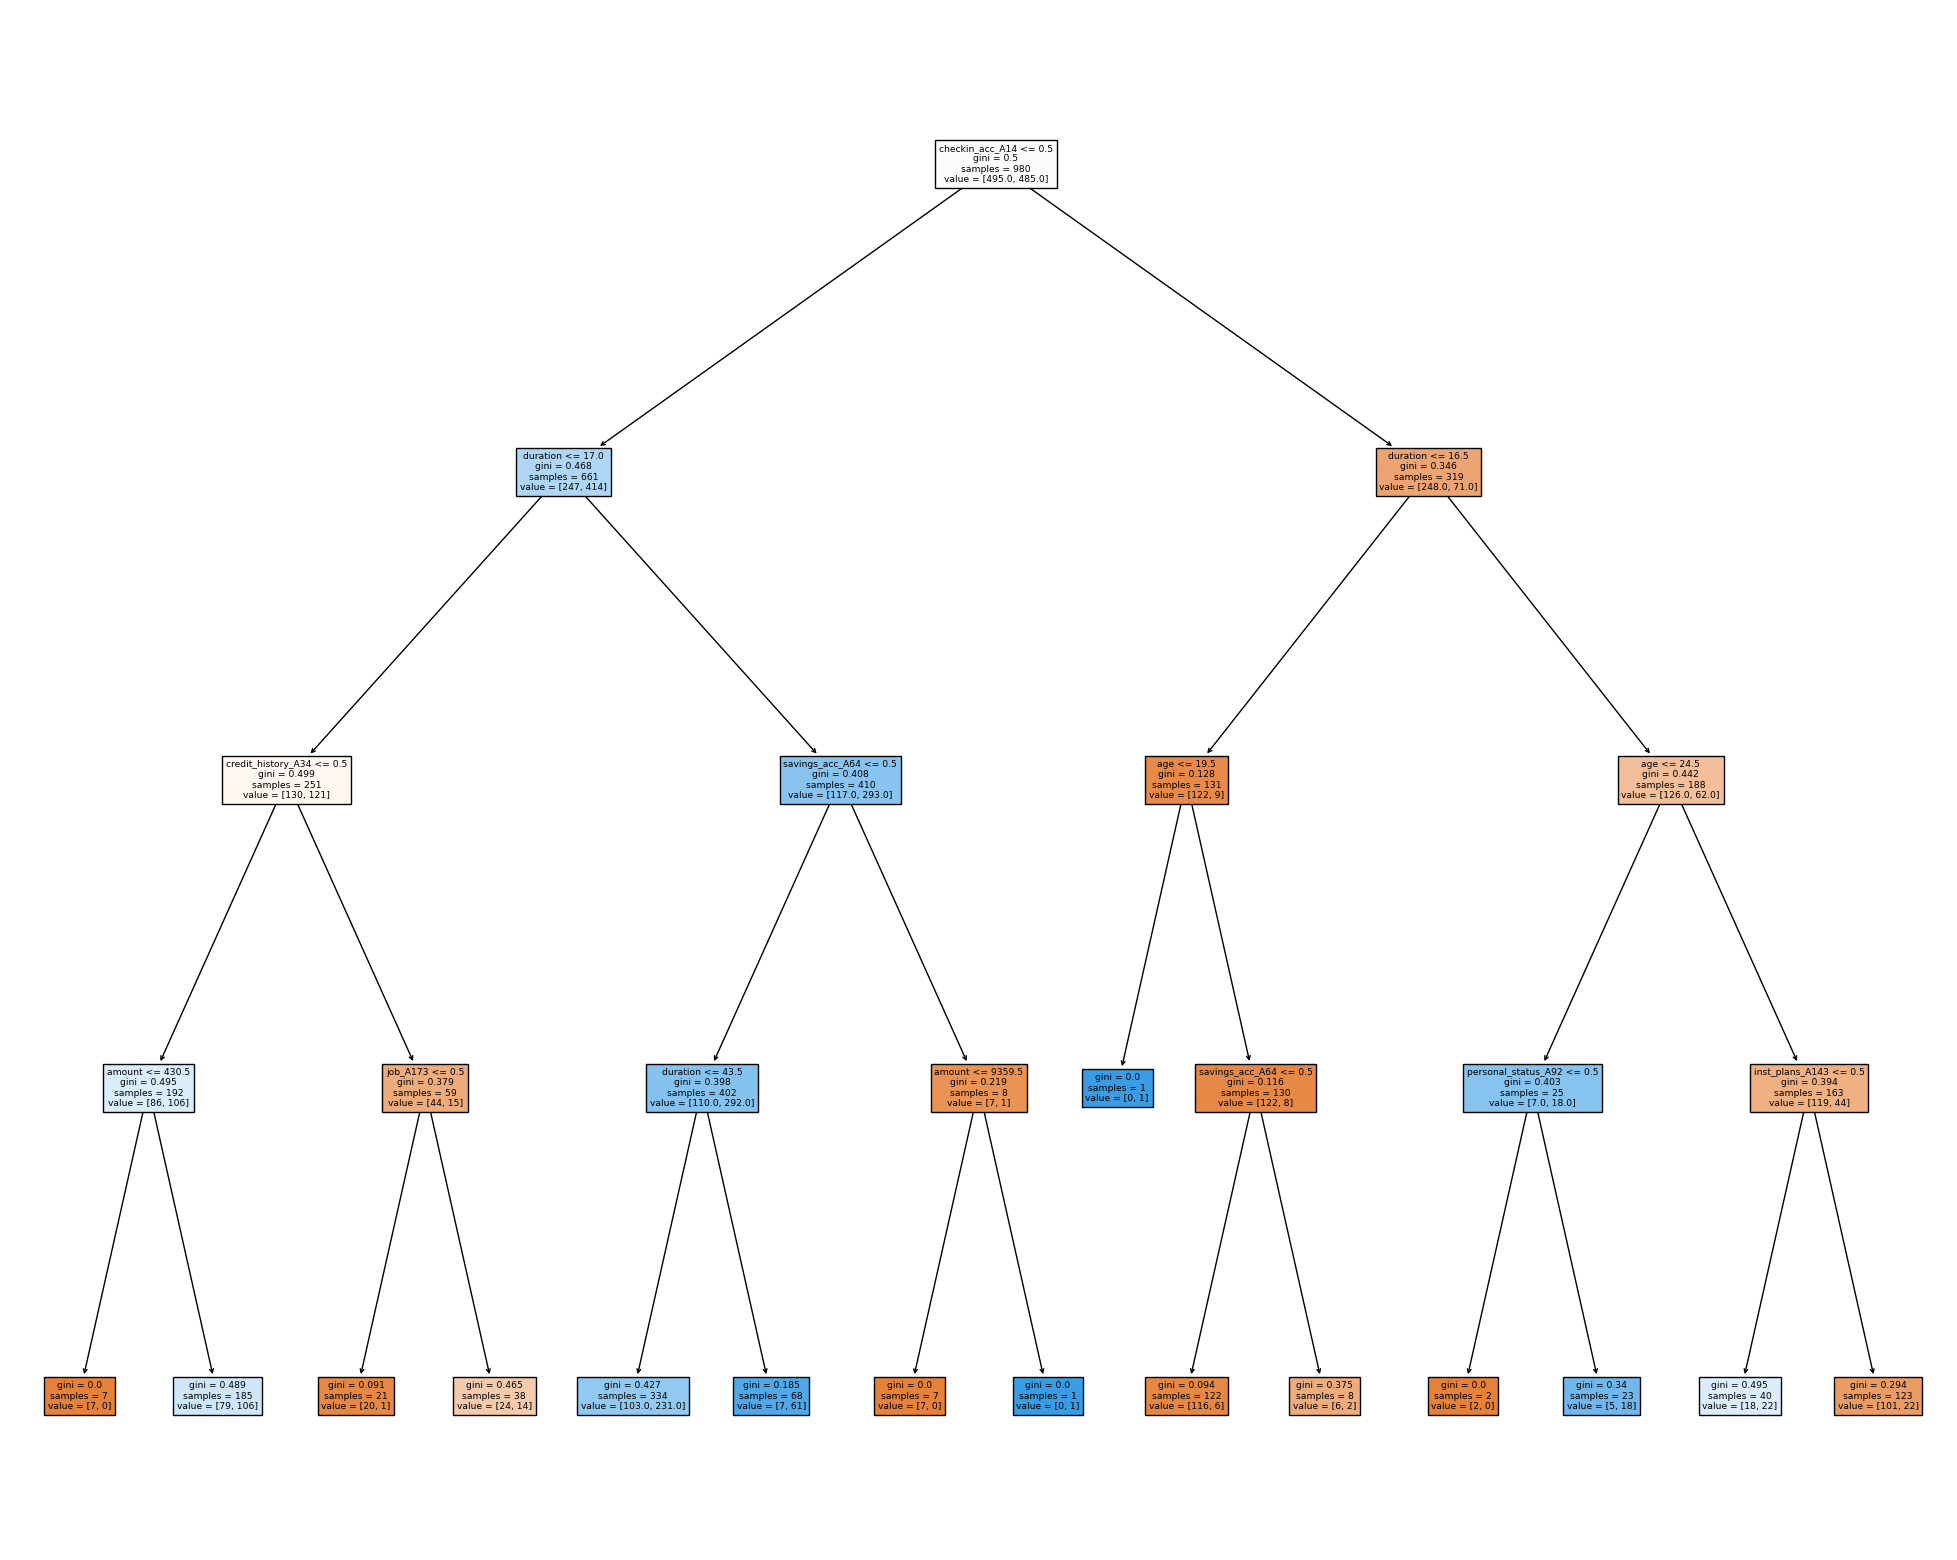

In [67]:
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(model_dt2,filled=True,feature_names=x_train.columns)

In [68]:
params = [{'criterion':['entropy','gini'], 'max_depth' : range(2,10)}]
modelCV1 = GridSearchCV(model_dt2,param,cv=10,scoring='accuracy')
modelCV1.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=4),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='accuracy')

In [69]:
modelCV1.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [70]:
modelCV1.best_score_

0.7510204081632653

In [71]:
mat = metrics.confusion_matrix(y_test,y_pred)
mat

array([[107,  98],
       [ 34, 181]], dtype=int64)

In [73]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.52      0.62       205
           1       0.65      0.84      0.73       215

    accuracy                           0.69       420
   macro avg       0.70      0.68      0.68       420
weighted avg       0.70      0.69      0.68       420

